In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D, BatchNormalization

np.random.seed(42)
tf.random.set_seed(42)

from preprocessing.getdata import *

In [2]:
df = get_csvdata()
dfTrain, dfTest, y_train, y_test = train_test_split(df, df['CDR'], stratify = df['CDR'], random_state=42)
N=5
X_train = get_slices(dfTrain['ID'], N=N, d=2, dim=2, m=90)
y_train = y_train.repeat(1+2*N)
X_test = get_slices(dfTest['ID'], dim=2, m=90)

In [3]:
HEIGHT = X_train.shape[1]
WIDTH = X_train.shape[2]

In [4]:
model = Sequential()

# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, 1], name='image'))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(Conv2D(8, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(BatchNormalization())
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(Conv2D(16, 3, activation="relu", padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64, activation="relu", kernel_regularizer=keras.regularizers.l2(l=0.5)))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy']) #[keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-22 15:59:00.265577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-22 15:59:00.267021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 8)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 88, 104, 8)       32        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 88, 104, 16)       1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 104, 16)       2

In [5]:
training = model.fit(X_train, y_train, batch_size = 16, validation_split=0.0, epochs = 100, validation_data=(X_test, y_test))
        #callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1.0*10**(-epoch/30))])

Epoch 1/100


2022-08-22 15:59:01.142498: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-22 15:59:01.552686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 28.8540 - accuracy: 0.5795

2022-08-22 15:59:07.463396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 7s 62ms/step - loss: 28.8540 - accuracy: 0.5795 - val_loss: 8.7791 - val_accuracy: 0.5000
Epoch 2/100
94/94 [==============================] - 6s 59ms/step - loss: 5.1310 - accuracy: 0.6811 - val_loss: 3.6547 - val_accuracy: 0.5000
Epoch 3/100
94/94 [==============================] - 6s 59ms/step - loss: 3.1953 - accuracy: 0.6979 - val_loss: 3.1022 - val_accuracy: 0.5000
Epoch 4/100
94/94 [==============================] - 5s 57ms/step - loss: 2.7957 - accuracy: 0.7166 - val_loss: 2.8020 - val_accuracy: 0.5000
Epoch 5/100
94/94 [==============================] - 6s 61ms/step - loss: 2.4932 - accuracy: 0.7507 - val_loss: 2.5755 - val_accuracy: 0.5000
Epoch 6/100
94/94 [==============================] - 5s 58ms/step - loss: 2.2512 - accuracy: 0.7373 - val_loss: 2.2831 - val_accuracy: 0.5435
Epoch 7/100
94/94 [==============================] - 6s 61ms/step - loss: 2.0385 - accuracy: 0.7527 - val_loss: 2.2001 - val_accuracy: 0.5217
Epoch 8/100
94/94

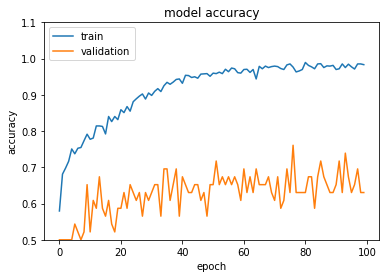

In [6]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

2022-08-22 16:12:07.717241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


accuracy:  0.63
recall:  0.87
precision:  0.59


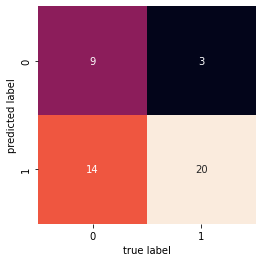

In [7]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

(0.0, 1.1)

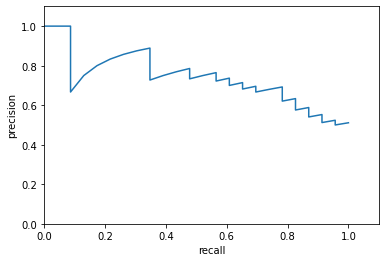

In [8]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predd)

plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0,1.1])
plt.ylim([0,1.1])